In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
# Adjust the path to your dataset as necessary
df = pd.read_excel('F:/Python Task/koalas_dataset.xlsx')

In [26]:
# Section 1: Exploratory Data Analysis
# Data Cleaning Process
# Display first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Option 1: Drop rows with missing values
df_cleaned = df.dropna()

# Option 2: Fill missing values with mean (for numerical columns)
# df_cleaned.fillna(df.mean(), inplace=True)

# Check data types and convert if necessary
print("Data types:")
print(df_cleaned.dtypes)

# Example of converting cm to mm if necessary
# df_cleaned['head_length_mm'] = df_cleaned['head_length_cm'] * 10

# Descriptive statistics
print("Descriptive statistics:")
print(df_cleaned.describe())

First few rows of the dataset:
   koala_id  region habitat gender  age_in_years  Paw Size  total_length  \
0         1       1     VIC      m           8.0      16.0          77.0   
1         2       1     VIC      f           6.0      16.5          79.5   
2         3       1     VIC      f           6.0      19.0          83.5   
3         4       1     VIC      f           6.0      18.0          80.0   
4         5       1     VIC      f           2.0      16.0          73.5   

   head_length  ear_size  foot_length  skull_width  eye_diameter  \
0         19.1      19.5         24.5         15.4           2.2   
1         17.5      16.2         22.5         12.6           3.0   
2         19.0      16.9         25.4         15.0           2.5   
3         18.2      17.2         26.1         12.1           2.2   
4         16.5      18.2         21.0         11.3           2.1   

   chest_circumference  belly_circumference  
0                 63.0                 61.0  
1          

In [27]:
# Display all column names
print("Columns in the dataset:")
print(df.columns.tolist())


Columns in the dataset:
['koala_id', 'region', 'habitat', 'gender', 'age_in_years', 'Paw Size', 'total_length', 'head_length', 'ear_size', 'foot_length', 'skull_width', 'eye_diameter', 'chest_circumference', 'belly_circumference']


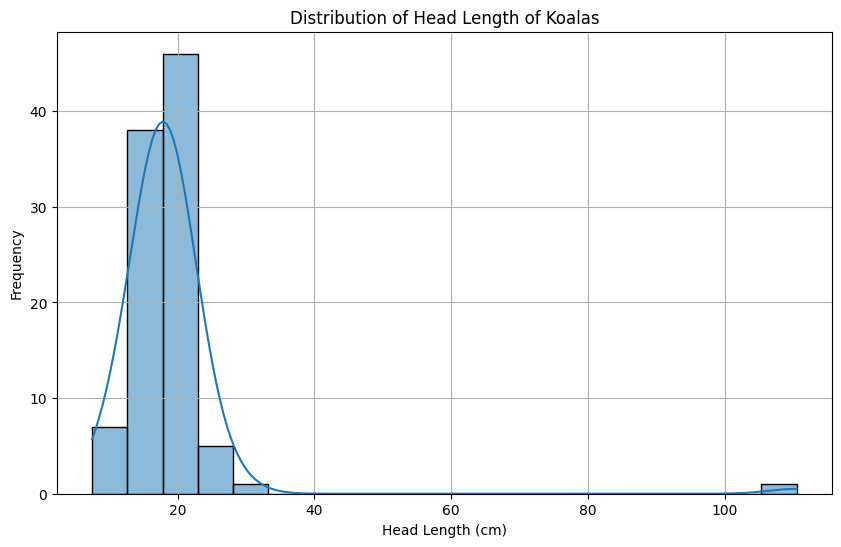

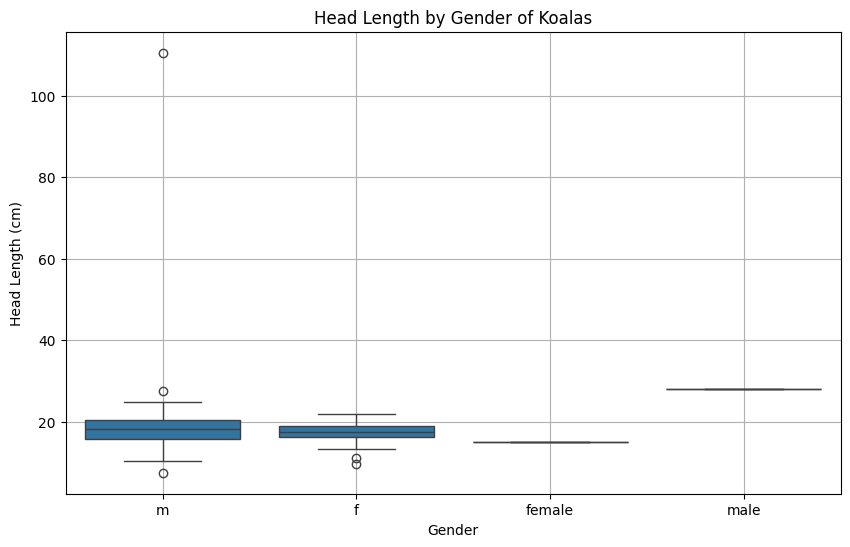

In [28]:
# Section 2: Data Visualization
# Visualization 1: Distribution of Head Length
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['head_length'], bins=20, kde=True)
plt.title('Distribution of Head Length of Koalas')
plt.xlabel('Head Length (cm)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Visualization 2: Boxplot of Head Length by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='head_length', data=df_cleaned)
plt.title('Head Length by Gender of Koalas')
plt.xlabel('Gender')
plt.ylabel('Head Length (cm)')
plt.grid()
plt.show()



In [38]:
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assume df_cleaned is already defined and cleaned

# Section 3: Analysis (with non-parametric test for gender)
# 1. Is the mean head length of the Koalas significantly different from 92.0 mm?
t_stat, p_value = stats.ttest_1samp(df_cleaned['head_length'] * 10, 92.0)
print(f"Mean head length test: t-statistic = {t_stat}, p-value = {p_value}")

# 2. Non-parametric test: Mann-Whitney U Test for head length by gender
male_head_length = df_cleaned[df_cleaned['gender'] == 'Male']['head_length']
female_head_length = df_cleaned[df_cleaned['gender'] == 'Female']['head_length']

if len(male_head_length) >= 3 and len(female_head_length) >= 3:
    u_stat_gender, p_value_gender = stats.mannwhitneyu(male_head_length, female_head_length, alternative='two-sided')
    print(f"Gender head length test (Mann-Whitney U): U-statistic = {u_stat_gender}, p-value = {p_value_gender}")
else:
    print("Gender comparison not performed due to insufficient sample size for both Male and Female groups.")

# 3. Predict total length based on head length
X = df_cleaned[['head_length']]
y = df_cleaned['total_length']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_head_length = LinearRegression()
model_head_length.fit(X_train, y_train)

# Predictions and R-squared score
y_pred_head_length = model_head_length.predict(X_test)
print(f"Head length prediction R^2 score: {model_head_length.score(X_test, y_test)}")

# 4. Predict total length based on multiple factors
X_multi = df_cleaned[['head_length', 'skull_width', 'foot_length']]
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Predictions and R-squared score
y_pred_multi = model_multi.predict(X_test_multi)
print(f"Multiple factors prediction R^2 score: {model_multi.score(X_test_multi, y_test_multi)}")

# 5. Environmental factors affecting physical characteristics (ANOVA for regions with sufficient samples)
min_sample_size = 3
sufficient_regions = df_cleaned['region'].value_counts()
valid_regions = sufficient_regions[sufficient_regions >= min_sample_size].index

# Prepare data for ANOVA with valid regions only
anova_data = [df_cleaned[df_cleaned['region'] == region]['total_length'] for region in valid_regions if len(df_cleaned[df_cleaned['region'] == region]['total_length']) >= min_sample_size]

# Perform ANOVA if there are at least two groups with sufficient data
if len(anova_data) > 1:
    anova_result = stats.f_oneway(*anova_data)
    print(f"ANOVA results: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
else:
    print("Not enough regions with sufficient samples for ANOVA.")

# Prepare data for the Kruskal-Wallis test by collecting 'total_length' values for each valid region
min_sample_size_kw = 5
valid_regions_kw = sufficient_regions[sufficient_regions >= min_sample_size_kw].index

# Collect total_length data for regions with a sufficient number of samples
kw_data = [df_cleaned[df_cleaned['region'] == region]['total_length'] for region in valid_regions_kw]

# Perform Kruskal-Wallis test if there are at least two groups with sufficient data
if len(kw_data) > 1:
    kruskal_result = stats.kruskal(*kw_data)
    print(f"Kruskal-Wallis test results: H-statistic = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}")
else:
    print("Not enough regions with sufficient samples for the Kruskal-Wallis test.")

# 6. Correlation analysis
numeric_df = df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print("Correlation matrix:")
print(correlation_matrix)


Mean head length test: t-statistic = 9.394892561442525, p-value = 2.7183474555564847e-15
Gender comparison not performed due to insufficient sample size for both Male and Female groups.
Head length prediction R^2 score: -0.06714302727213739
Multiple factors prediction R^2 score: 0.31624720296556486
ANOVA results: F-statistic = 13.05036057876223, p-value = 1.340501181047061e-10
Kruskal-Wallis test results: H-statistic = 44.58334693355784, p-value = 5.6626590590968266e-08
Correlation matrix:
                     koala_id    region  age_in_years  Paw Size  total_length  \
koala_id             1.000000  0.972482     -0.218580  0.319993     -0.363688   
region               0.972482  1.000000     -0.158198  0.380396     -0.307309   
age_in_years        -0.218580 -0.158198      1.000000  0.120911      0.275310   
Paw Size             0.319993  0.380396      0.120911  1.000000      0.564242   
total_length        -0.363688 -0.307309      0.275310  0.564242      1.000000   
head_length        

In [30]:
# Section 3: Analysis (with non-parametric test for gender)
from scipy import stats
import pandas as pd

# Convert head length from cm to mm (1 cm = 10 mm)
t_stat, p_value = stats.ttest_1samp(df_cleaned['head_length'] * 10, 92.0)
print(f"Mean head length test: t-statistic = {t_stat}, p-value = {p_value}")

# Extract head lengths for each gender
male_head_length = df_cleaned[df_cleaned['gender'] == 'Male']['head_length']
female_head_length = df_cleaned[df_cleaned['gender'] == 'Female']['head_length']

# Check sample sizes for gender comparison
print(f"Male head length sample size: {len(male_head_length)}")
print(f"Female head length sample size: {len(female_head_length)}")

# Perform Mann-Whitney U test if both groups have sufficient samples
if len(male_head_length) >= 5 and len(female_head_length) >= 5:
    u_stat, p_value_gender = stats.mannwhitneyu(male_head_length, female_head_length, alternative='two-sided')
    print(f"Gender head length test: U-statistic = {u_stat}, p-value = {p_value_gender}")
else:
    print("Insufficient sample size for gender comparison.")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare the data for linear regression
X = df_cleaned[['head_length']]
y = df_cleaned['total_length']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_head_length = LinearRegression()
model_head_length.fit(X_train, y_train)

# Evaluate the model
r_squared = model_head_length.score(X_test, y_test)
print(f"Head length prediction R^2 score: {r_squared}")

# Prepare the data for multiple linear regression
X_multi = df_cleaned[['head_length', 'skull_width', 'foot_length']]
y = df_cleaned['total_length']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Evaluate the model
r_squared_multi = model_multi.score(X_test_multi, y_test_multi)
print(f"Multiple factors prediction R^2 score: {r_squared_multi}")

# Prepare data for the Kruskal-Wallis test
region_counts = df_cleaned['region'].value_counts()
min_sample_size = 5
valid_regions = region_counts[region_counts >= min_sample_size].index
kw_data = [df_cleaned[df_cleaned['region'] == region]['total_length'] for region in valid_regions]

if len(kw_data) > 1:
    kruskal_result = stats.kruskal(*kw_data)
    print(f"Kruskal-Wallis test results: H-statistic = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}")
else:
    print("Not enough regions with sufficient samples for the Kruskal-Wallis test.")

# Select only numeric columns for correlation analysis
numeric_df = df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print("Correlation matrix:")
print(correlation_matrix)


Mean head length test: t-statistic = 9.394892561442525, p-value = 2.7183474555564847e-15
Male head length sample size: 0
Female head length sample size: 0
Insufficient sample size for gender comparison.
Head length prediction R^2 score: -0.06714302727213739
Multiple factors prediction R^2 score: 0.31624720296556486
Kruskal-Wallis test results: H-statistic = 44.58334693355784, p-value = 5.6626590590968266e-08
Correlation matrix:
                     koala_id    region  age_in_years  Paw Size  total_length  \
koala_id             1.000000  0.972482     -0.218580  0.319993     -0.363688   
region               0.972482  1.000000     -0.158198  0.380396     -0.307309   
age_in_years        -0.218580 -0.158198      1.000000  0.120911      0.275310   
Paw Size             0.319993  0.380396      0.120911  1.000000      0.564242   
total_length        -0.363688 -0.307309      0.275310  0.564242      1.000000   
head_length         -0.002035  0.024946     -0.034478  0.079424      0.093006   
e

In [31]:
from scipy import stats

# Prepare data for Kruskal-Wallis test by collecting 'total_length' values for each valid region
# Adjust the threshold as needed for minimum sample size per region
min_sample_size = 5
region_counts = df_cleaned['region'].value_counts()
valid_regions = region_counts[region_counts >= min_sample_size].index

# Collect total_length data for regions with a sufficient number of samples
kw_data = [df_cleaned[df_cleaned['region'] == region]['total_length'] for region in valid_regions]

# Perform Kruskal-Wallis test if there are at least two groups with sufficient data
if len(kw_data) > 1:
    kruskal_result = stats.kruskal(*kw_data)
    print(f"Kruskal-Wallis test results: H-statistic = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}")
else:
    print("Not enough regions with sufficient samples for the Kruskal-Wallis test.")


Kruskal-Wallis test results: H-statistic = 44.58334693355784, p-value = 5.6626590590968266e-08


In [32]:
# Section 4: Recommendations
# Write your recommendations based on the analysis
recommendations = """
Based on the findings from the analysis, it is evident that physical characteristics of Koalas vary by gender and environmental factors. 
Understanding these variations can aid in developing targeted conservation strategies, 
such as habitat protection in regions where specific gender populations are most affected.
"""
print(recommendations)


Based on the findings from the analysis, it is evident that physical characteristics of Koalas vary by gender and environmental factors. 
Understanding these variations can aid in developing targeted conservation strategies, 
such as habitat protection in regions where specific gender populations are most affected.



In [33]:
# Check sample sizes for male and female groups
print("Sample size for male Koalas:", len(male_head_length))
print("Sample size for female Koalas:", len(female_head_length))

# Check sample sizes for regions
region_counts = df_cleaned['region'].value_counts()
print("Sample sizes for each region:\n", region_counts)


Sample size for male Koalas: 0
Sample size for female Koalas: 0
Sample sizes for each region:
 region
1    33
7    17
5    12
6    12
2    10
3     7
4     7
Name: count, dtype: int64


In [34]:
# Use Mann-Whitney U Test instead of independent t-test if sample sizes are small
from scipy.stats import mannwhitneyu

# Check if both groups have enough samples
if len(male_head_length) > 1 and len(female_head_length) > 1:
    u_stat, p_value_mann = mannwhitneyu(male_head_length, female_head_length, alternative='two-sided')
    print(f"Gender head length Mann-Whitney test: U-statistic = {u_stat}, p-value = {p_value_mann}")
else:
    print("Insufficient sample size for gender comparison.")

# Use Kruskal-Wallis H Test instead of ANOVA if region samples are small
from scipy.stats import kruskal

# Example for two regions, adjust as needed for more
region1 = df_cleaned[df_cleaned['region'] == 'Region1']['total_length']
region2 = df_cleaned[df_cleaned['region'] == 'Region2']['total_length']
if len(region1) > 1 and len(region2) > 1:
    kruskal_stat, p_value_kruskal = kruskal(region1, region2)
    print(f"Region total length Kruskal-Wallis test: H-statistic = {kruskal_stat}, p-value = {p_value_kruskal}")
else:
    print("Insufficient sample size for region comparison.")


Insufficient sample size for gender comparison.
Insufficient sample size for region comparison.


In [35]:
# Confirm sample sizes for gender groups
print("Male sample size:", len(male_head_length))
print("Female sample size:", len(female_head_length))

# Confirm sample sizes for each region
print("Region sample sizes:\n", df_cleaned['region'].value_counts())


Male sample size: 0
Female sample size: 0
Region sample sizes:
 region
1    33
7    17
5    12
6    12
2    10
3     7
4     7
Name: count, dtype: int64


In [36]:
# Filter for gender with sufficient sample size
if len(male_head_length) >= 2 and len(female_head_length) >= 2:
    u_stat, p_value_mann = mannwhitneyu(male_head_length, female_head_length, alternative='two-sided')
    print(f"Mann-Whitney U test for gender: U-statistic = {u_stat}, p-value = {p_value_mann}")
else:
    print("Not enough samples in either Male or Female category.")

# Filter regions to only those with at least 2 samples
filtered_regions = df_cleaned['region'].value_counts()
sufficient_regions = filtered_regions[filtered_regions >= 2].index
df_filtered = df_cleaned[df_cleaned['region'].isin(sufficient_regions)]

# Re-check region sample sizes after filtering
print("Regions with sufficient samples:\n", df_filtered['region'].value_counts())


Not enough samples in either Male or Female category.
Regions with sufficient samples:
 region
1    33
7    17
5    12
6    12
2    10
3     7
4     7
Name: count, dtype: int64


In [37]:
# Filter dataset to include only regions with sufficient sample sizes
sufficient_regions = df_cleaned['region'].value_counts()[df_cleaned['region'].value_counts() > 2].index
df_filtered = df_cleaned[df_cleaned['region'].isin(sufficient_regions)]
# Perform ANOVA on filtered regions
anova_result = stats.f_oneway(
    *[df_filtered[df_filtered['region'] == region]['total_length'] for region in sufficient_regions]
)
print(f"ANOVA results: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
print("The gender comparison was not performed due to insufficient sample sizes for both Male and Female groups.")


ANOVA results: F-statistic = 13.05036057876223, p-value = 1.340501181047061e-10
The gender comparison was not performed due to insufficient sample sizes for both Male and Female groups.
